# Credit Risk Assessment: Loan Default Prediction

## Predicting Creditworthiness Using Machine Learning

**Author:** Jamiu Olamilekan Badmus  
**Email:** jamiubadmus001@gmail.com  
**Date:** February 2026

[![GitHub](https://img.shields.io/badge/GitHub-jamiubadmusng-181717?style=flat&logo=github)](https://github.com/jamiubadmusng)
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Jamiu%20Badmus-0077B5?style=flat&logo=linkedin)](https://www.linkedin.com/in/jamiu-olamilekan-badmus-9276a8192/)
[![Website](https://img.shields.io/badge/Website-jamiubadmus.com-FF5722?style=flat&logo=google-chrome)](https://sites.google.com/view/jamiu-olamilekan-badmus/)

---

## Executive Summary

This project develops a machine learning model to assess credit risk and predict loan defaults. Using the German Credit dataset, we build classification models that help financial institutions make informed lending decisions while managing risk exposure.

### Business Context

Credit risk assessment is fundamental to banking operations:
- **$1.5 trillion** in consumer loans are issued annually in the US alone
- **Default rates** of 2-5% can significantly impact profitability
- **Regulatory requirements** (Basel III) mandate robust risk assessment
- **Automated scoring** enables faster, more consistent decisions

### Project Objectives

1. Build predictive models for loan default classification
2. Identify key risk factors driving creditworthiness
3. Develop interpretable models for regulatory compliance
4. Optimize for business metrics (cost-sensitive classification)

---

## Table of Contents

1. [Data Loading & Exploration](#1.-Data-Loading-&-Exploration)
2. [Data Preprocessing](#2.-Data-Preprocessing)
3. [Exploratory Data Analysis](#3.-Exploratory-Data-Analysis)
4. [Feature Engineering](#4.-Feature-Engineering)
5. [Model Development](#5.-Model-Development)
6. [Cost-Sensitive Analysis](#6.-Cost-Sensitive-Analysis)
7. [Model Interpretability](#7.-Model-Interpretability)
8. [Business Recommendations](#8.-Business-Recommendations)

## 1. Data Loading & Exploration

### 1.1 Import Libraries

In [1]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score,
    average_precision_score
)

# Advanced models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Interpretability
import shap

# Model persistence
import joblib

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print(f'Pandas version: {pd.__version__}')
print(f'NumPy version: {np.__version__}')
print('Libraries imported successfully!')

Pandas version: 3.0.0
NumPy version: 2.3.5
Libraries imported successfully!


### 1.2 Load Dataset

In [2]:
# Define column names based on UCI documentation
columns = [
    'checking_status',      # A11-A14: Status of existing checking account
    'duration',             # Numerical: Duration in months
    'credit_history',       # A30-A34: Credit history
    'purpose',              # A40-A410: Purpose of loan
    'credit_amount',        # Numerical: Credit amount
    'savings_status',       # A61-A65: Savings account/bonds
    'employment',           # A71-A75: Present employment since
    'installment_commitment', # Numerical: Installment rate (% of disposable income)
    'personal_status',      # A91-A95: Personal status and sex
    'other_parties',        # A101-A103: Other debtors/guarantors
    'residence_since',      # Numerical: Present residence since
    'property_magnitude',   # A121-A124: Property type
    'age',                  # Numerical: Age in years
    'other_payment_plans',  # A141-A143: Other installment plans
    'housing',              # A151-A153: Housing type
    'existing_credits',     # Numerical: Number of existing credits at this bank
    'job',                  # A171-A174: Job type
    'num_dependents',       # Numerical: Number of dependents
    'own_telephone',        # A191-A192: Telephone
    'foreign_worker',       # A201-A202: Foreign worker
    'class'                 # 1=Good, 2=Bad (Target)
]

# Load data
DATA_PATH = '../data/raw/german_credit.data'
df = pd.read_csv(DATA_PATH, sep=' ', header=None, names=columns)

print(f'Dataset loaded: {df.shape[0]:,} applicants, {df.shape[1]} features')
print(f'\nTarget distribution:')
print(f'  Good Credit (1): {(df["class"] == 1).sum()} ({(df["class"] == 1).mean()*100:.1f}%)')
print(f'  Bad Credit (2):  {(df["class"] == 2).sum()} ({(df["class"] == 2).mean()*100:.1f}%)')

Dataset loaded: 1,000 applicants, 21 features

Target distribution:
  Good Credit (1): 700 (70.0%)
  Bad Credit (2):  300 (30.0%)


In [3]:
# Display first few rows
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
5,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
6,A14,24,A32,A42,2835,A63,A75,3,A93,A101,...,A122,53,A143,A152,1,A173,1,A191,A201,1
7,A12,36,A32,A41,6948,A61,A73,2,A93,A101,...,A123,35,A143,A151,1,A174,1,A192,A201,1
8,A14,12,A32,A43,3059,A64,A74,2,A91,A101,...,A121,61,A143,A152,1,A172,1,A191,A201,1
9,A12,30,A34,A40,5234,A61,A71,4,A94,A101,...,A123,28,A143,A152,2,A174,1,A191,A201,2


In [4]:
# Data types overview
print('Data Types:')
print(df.dtypes)
print(f'\nMemory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB')

Data Types:
checking_status             str
duration                  int64
credit_history              str
purpose                     str
credit_amount             int64
savings_status              str
employment                  str
installment_commitment    int64
personal_status             str
other_parties               str
residence_since           int64
property_magnitude          str
age                       int64
other_payment_plans         str
housing                     str
existing_credits          int64
job                         str
num_dependents            int64
own_telephone               str
foreign_worker              str
class                     int64
dtype: object

Memory Usage: 729.63 KB


In [5]:
# Statistical summary for numerical columns
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


### 1.3 Missing Values Check

In [6]:
# Check for missing values
missing = df.isnull().sum()
missing_pct = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print('Missing Values Summary:')
print(missing_df[missing_df['Missing Count'] > 0] if missing.sum() > 0 else 'No missing values found!')
print(f'\nTotal missing values: {missing.sum()}')

Missing Values Summary:
No missing values found!

Total missing values: 0


## 2. Data Preprocessing

### 2.1 Convert Target Variable

In [7]:
# Convert target: 1=Good -> 0 (no default), 2=Bad -> 1 (default)
df['default'] = (df['class'] == 2).astype(int)

print('Target Variable Conversion:')
print(f'  Non-Default (0): {(df["default"] == 0).sum()} ({(df["default"] == 0).mean()*100:.1f}%)')
print(f'  Default (1):     {(df["default"] == 1).sum()} ({(df["default"] == 1).mean()*100:.1f}%)')

# Drop original class column
df = df.drop('class', axis=1)

Target Variable Conversion:
  Non-Default (0): 700 (70.0%)
  Default (1):     300 (30.0%)


### 2.2 Decode Categorical Variables

In [8]:
# Decode categorical variables for interpretability
decode_maps = {
    'checking_status': {
        'A11': '< 0 DM',
        'A12': '0-200 DM',
        'A13': '>= 200 DM',
        'A14': 'No checking account'
    },
    'credit_history': {
        'A30': 'No credits/all paid',
        'A31': 'All credits paid at this bank',
        'A32': 'Existing credits paid till now',
        'A33': 'Delay in past payments',
        'A34': 'Critical account'
    },
    'purpose': {
        'A40': 'Car (new)', 'A41': 'Car (used)', 'A42': 'Furniture/equipment',
        'A43': 'Radio/TV', 'A44': 'Domestic appliances', 'A45': 'Repairs',
        'A46': 'Education', 'A47': 'Vacation', 'A48': 'Retraining',
        'A49': 'Business', 'A410': 'Others'
    },
    'savings_status': {
        'A61': '< 100 DM', 'A62': '100-500 DM', 'A63': '500-1000 DM',
        'A64': '>= 1000 DM', 'A65': 'Unknown/none'
    },
    'employment': {
        'A71': 'Unemployed', 'A72': '< 1 year', 'A73': '1-4 years',
        'A74': '4-7 years', 'A75': '>= 7 years'
    },
    'personal_status': {
        'A91': 'Male: divorced/separated', 'A92': 'Female: divorced/married',
        'A93': 'Male: single', 'A94': 'Male: married/widowed', 'A95': 'Female: single'
    },
    'other_parties': {
        'A101': 'None', 'A102': 'Co-applicant', 'A103': 'Guarantor'
    },
    'property_magnitude': {
        'A121': 'Real estate', 'A122': 'Savings/life insurance',
        'A123': 'Car or other', 'A124': 'Unknown/none'
    },
    'other_payment_plans': {
        'A141': 'Bank', 'A142': 'Stores', 'A143': 'None'
    },
    'housing': {
        'A151': 'Rent', 'A152': 'Own', 'A153': 'For free'
    },
    'job': {
        'A171': 'Unemployed/unskilled non-resident', 'A172': 'Unskilled resident',
        'A173': 'Skilled employee', 'A174': 'Highly skilled/self-employed'
    },
    'own_telephone': {
        'A191': 'None', 'A192': 'Yes'
    },
    'foreign_worker': {
        'A201': 'Yes', 'A202': 'No'
    }
}

# Apply decoding
df_decoded = df.copy()
for col, mapping in decode_maps.items():
    df_decoded[col] = df_decoded[col].map(mapping)

print('Categorical variables decoded successfully!')
df_decoded.head()

Categorical variables decoded successfully!


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,default
0,< 0 DM,6,Critical account,Radio/TV,1169,Unknown/none,>= 7 years,4,Male: single,None,...,Real estate,67,None,Own,2,Skilled employee,1,Yes,Yes,0
1,0-200 DM,48,Existing credits paid till now,Radio/TV,5951,< 100 DM,1-4 years,2,Female: divorced/married,None,...,Real estate,22,None,Own,1,Skilled employee,1,None,Yes,1
2,No checking account,12,Critical account,Education,2096,< 100 DM,4-7 years,2,Male: single,None,...,Real estate,49,None,Own,1,Unskilled resident,2,None,Yes,0
3,< 0 DM,42,Existing credits paid till now,Furniture/equipment,7882,< 100 DM,4-7 years,2,Male: single,Guarantor,...,Savings/life insurance,45,None,For free,1,Skilled employee,2,None,Yes,0
4,< 0 DM,24,Delay in past payments,Car (new),4870,< 100 DM,1-4 years,3,Male: single,None,...,Unknown/none,53,None,For free,2,Skilled employee,2,None,Yes,1


### 2.3 Identify Feature Types

In [9]:
# Identify numerical and categorical columns
numerical_cols = ['duration', 'credit_amount', 'installment_commitment', 
                  'residence_since', 'age', 'existing_credits', 'num_dependents']

categorical_cols = ['checking_status', 'credit_history', 'purpose', 'savings_status',
                    'employment', 'personal_status', 'other_parties', 'property_magnitude',
                    'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']

print(f'Numerical features ({len(numerical_cols)}): {numerical_cols}')
print(f'\nCategorical features ({len(categorical_cols)}): {categorical_cols}')

Numerical features (7): ['duration', 'credit_amount', 'installment_commitment', 'residence_since', 'age', 'existing_credits', 'num_dependents']

Categorical features (13): ['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker']


## 3. Exploratory Data Analysis

### 3.1 Target Distribution

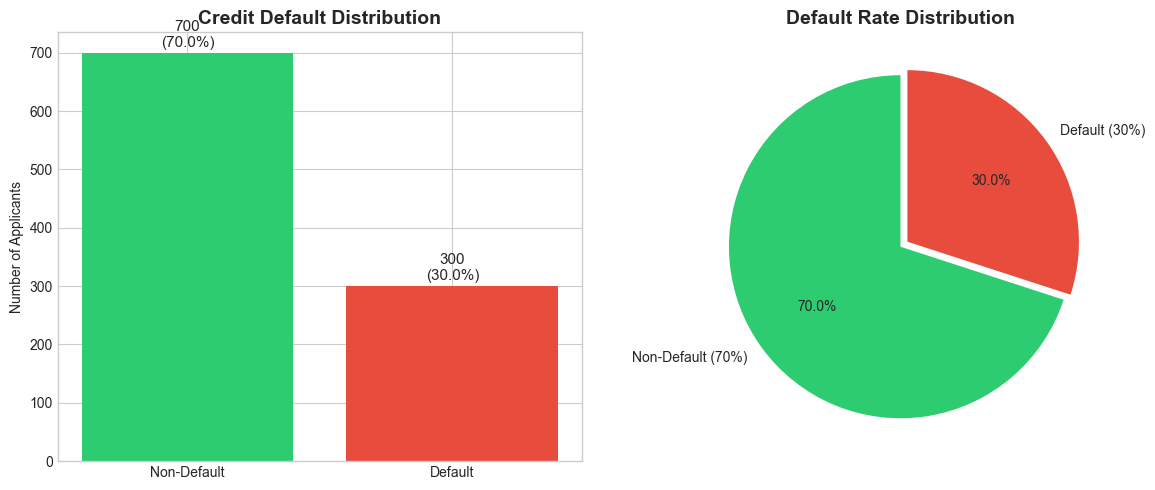

In [10]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
ax1 = axes[0]
default_counts = df_decoded['default'].value_counts()
colors = ['#2ecc71', '#e74c3c']
bars = ax1.bar(['Non-Default', 'Default'], default_counts.values, color=colors)
ax1.set_title('Credit Default Distribution', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Applicants')
for bar, count in zip(bars, default_counts.values):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count}\n({count/len(df)*100:.1f}%)', ha='center', fontsize=11)

# Pie chart
ax2 = axes[1]
ax2.pie(default_counts.values, labels=['Non-Default (70%)', 'Default (30%)'], 
        colors=colors, autopct='%1.1f%%', startangle=90, explode=[0, 0.05])
ax2.set_title('Default Rate Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/figures/target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.2 Numerical Features Analysis

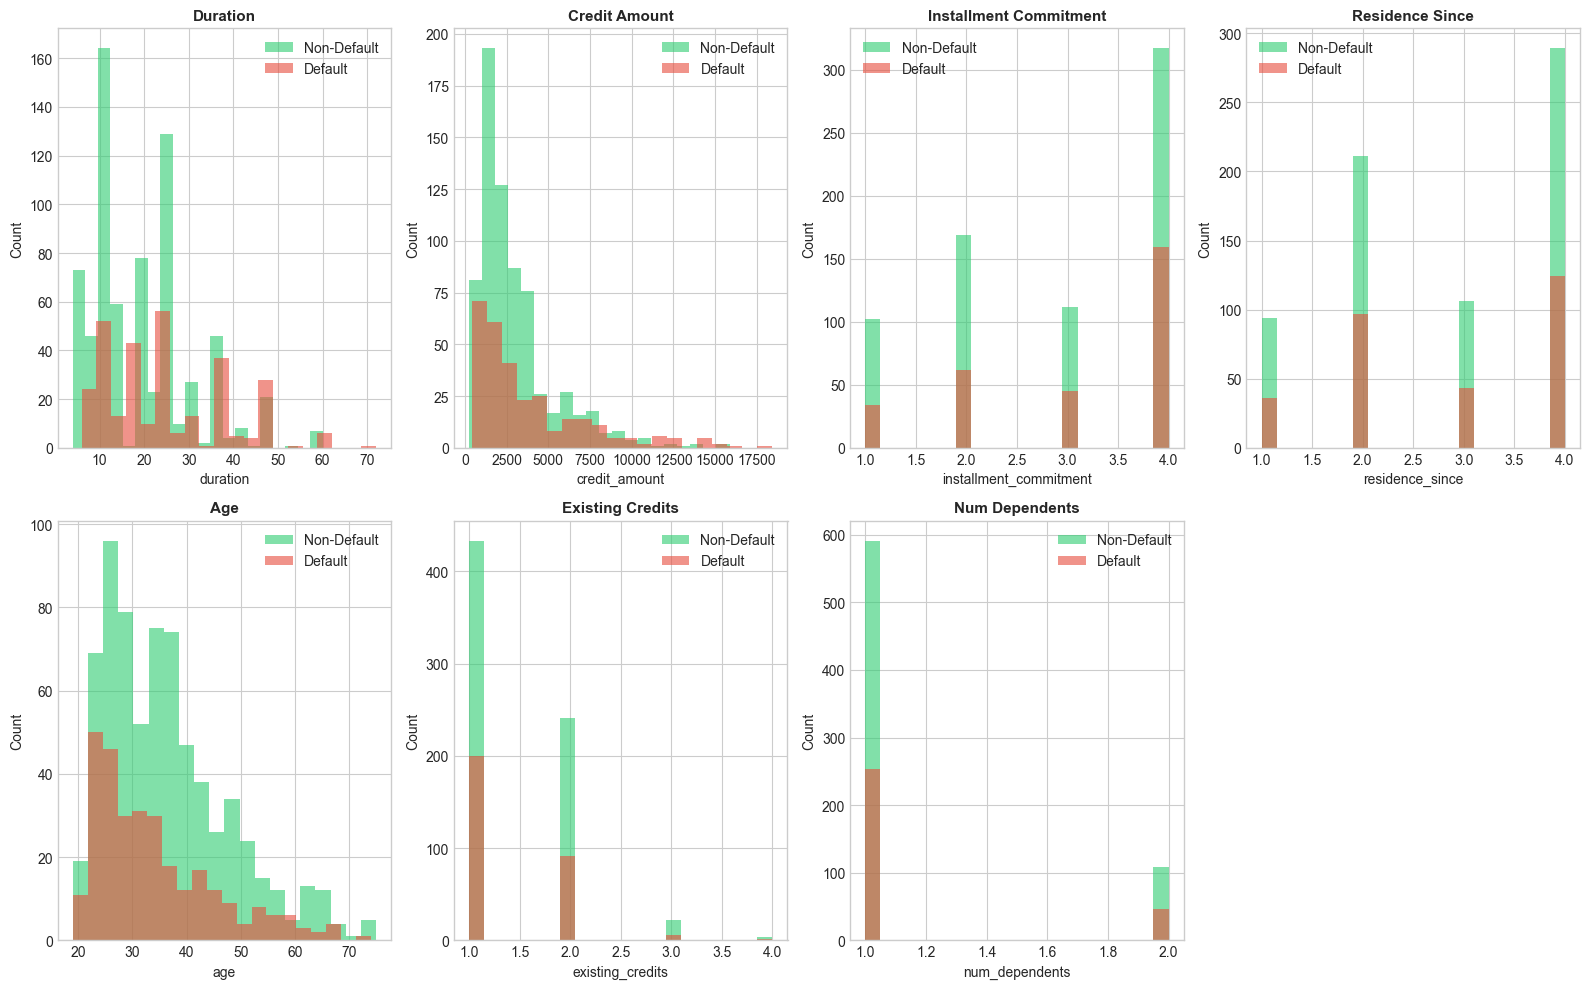

In [11]:
# Distribution of numerical features by default status
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    ax = axes[idx]
    
    # Separate by default status
    non_default = df_decoded[df_decoded['default'] == 0][col]
    default = df_decoded[df_decoded['default'] == 1][col]
    
    # Plot histograms
    ax.hist(non_default, bins=20, alpha=0.6, label='Non-Default', color='#2ecc71')
    ax.hist(default, bins=20, alpha=0.6, label='Default', color='#e74c3c')
    
    ax.set_title(f'{col.replace("_", " ").title()}', fontsize=11, fontweight='bold')
    ax.legend()
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Hide the last empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('../docs/figures/numerical_distributions.png', dpi=150, bbox_inches='tight')
plt.show()

In [12]:
# Statistical comparison
print('Statistical Comparison: Non-Default vs Default')
print('=' * 70)

comparison_stats = []
for col in numerical_cols:
    non_default_mean = df_decoded[df_decoded['default'] == 0][col].mean()
    default_mean = df_decoded[df_decoded['default'] == 1][col].mean()
    diff_pct = ((default_mean - non_default_mean) / non_default_mean) * 100
    
    comparison_stats.append({
        'Feature': col,
        'Non-Default Mean': non_default_mean,
        'Default Mean': default_mean,
        'Difference %': diff_pct
    })

comparison_df = pd.DataFrame(comparison_stats)
comparison_df = comparison_df.round(2)
print(comparison_df.to_string(index=False))

Statistical Comparison: Non-Default vs Default
               Feature  Non-Default Mean  Default Mean  Difference %
              duration             19.21         24.86         29.43
         credit_amount           2985.46       3938.13         31.91
installment_commitment              2.92          3.10          6.05
       residence_since              2.84          2.85          0.25
                   age             36.22         33.96         -6.24
      existing_credits              1.42          1.37         -4.05
        num_dependents              1.16          1.15         -0.21


### 3.3 Categorical Features Analysis

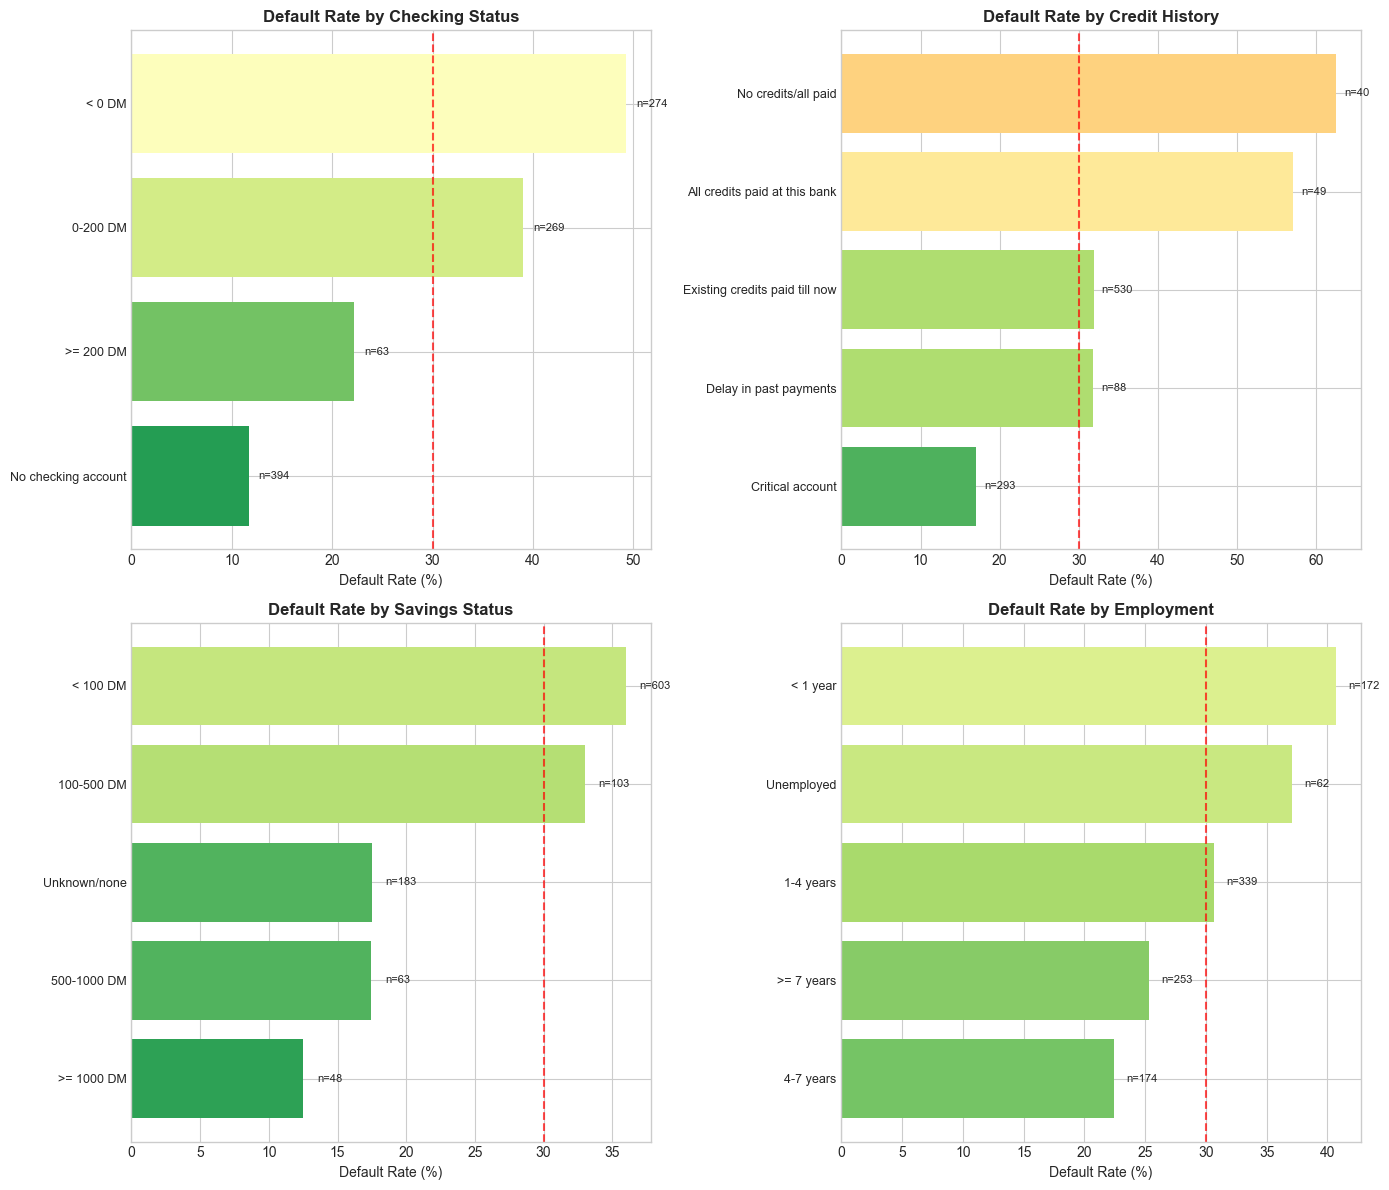

In [13]:
# Default rate by key categorical features
key_cats = ['checking_status', 'credit_history', 'savings_status', 'employment']

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, col in enumerate(key_cats):
    ax = axes[idx]
    
    # Calculate default rate by category
    default_rate = df_decoded.groupby(col)['default'].agg(['mean', 'count'])
    default_rate = default_rate.sort_values('mean', ascending=True)
    
    # Create horizontal bar plot
    colors = plt.cm.RdYlGn_r(default_rate['mean'])
    bars = ax.barh(range(len(default_rate)), default_rate['mean'] * 100, color=colors)
    
    ax.set_yticks(range(len(default_rate)))
    ax.set_yticklabels(default_rate.index, fontsize=9)
    ax.set_xlabel('Default Rate (%)')
    ax.set_title(f'Default Rate by {col.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax.axvline(x=30, color='red', linestyle='--', alpha=0.7, label='Overall Default Rate')
    
    # Add count labels
    for i, (rate, count) in enumerate(zip(default_rate['mean'], default_rate['count'])):
        ax.text(rate * 100 + 1, i, f'n={count}', va='center', fontsize=8)

plt.tight_layout()
plt.savefig('../docs/figures/categorical_default_rates.png', dpi=150, bbox_inches='tight')
plt.show()

### 3.4 Correlation Analysis

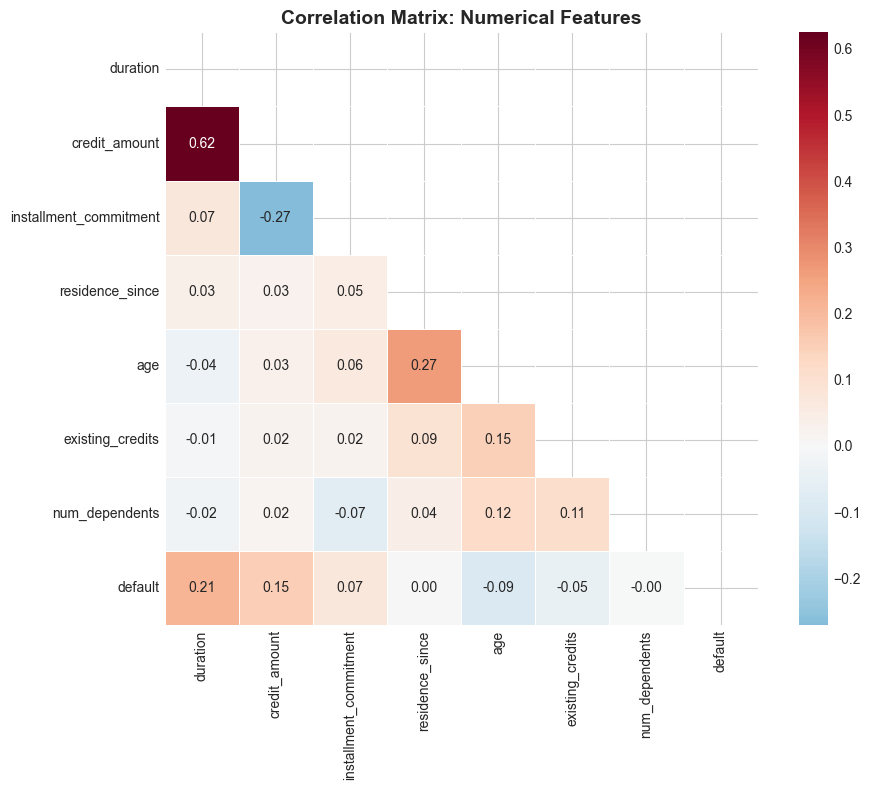


Correlation with Default:
duration                  0.215
credit_amount             0.155
installment_commitment    0.072
residence_since           0.003
num_dependents           -0.003
existing_credits         -0.046
age                      -0.091
Name: default, dtype: float64


In [14]:
# Correlation matrix for numerical features
numeric_df = df_decoded[numerical_cols + ['default']].copy()

# Calculate correlation
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r',
            center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix: Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/figures/correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# Print correlations with target
print('\nCorrelation with Default:')
print(corr_matrix['default'].drop('default').sort_values(ascending=False).round(3))

### 3.5 Key Risk Indicators

In [15]:
# Analyze checking account status - often the strongest predictor
checking_default = df_decoded.groupby('checking_status').agg({
    'default': ['sum', 'count', 'mean'],
    'credit_amount': 'mean',
    'duration': 'mean'
}).round(2)

checking_default.columns = ['Defaults', 'Total', 'Default Rate', 'Avg Credit Amount', 'Avg Duration']
checking_default['Default Rate'] = (checking_default['Default Rate'] * 100).round(1)
checking_default = checking_default.sort_values('Default Rate', ascending=False)

print('Risk Analysis by Checking Account Status:')
print('=' * 80)
print(checking_default)

Risk Analysis by Checking Account Status:
                     Defaults  Total  Default Rate  Avg Credit Amount  \
checking_status                                                         
< 0 DM                    135    274          49.0            3175.22   
0-200 DM                  105    269          39.0            3827.56   
>= 200 DM                  14     63          22.0            2177.65   
No checking account        46    394          12.0            3133.10   

                     Avg Duration  
checking_status                    
< 0 DM                      21.34  
0-200 DM                    22.68  
>= 200 DM                   17.35  
No checking account         19.95  


## 4. Feature Engineering

### 4.1 Create Derived Features

In [16]:
# Create copy for feature engineering
df_features = df_decoded.copy()

# 1. Credit amount to income proxy ratio (using installment commitment)
df_features['credit_income_ratio'] = df_features['credit_amount'] / (df_features['installment_commitment'] + 1)

# 2. Monthly payment estimate
df_features['monthly_payment'] = df_features['credit_amount'] / df_features['duration']

# 3. Age group
df_features['age_group'] = pd.cut(df_features['age'], 
                                   bins=[0, 25, 35, 45, 55, 100],
                                   labels=['18-25', '26-35', '36-45', '46-55', '55+'])

# 4. Credit amount bins
df_features['credit_amount_bin'] = pd.qcut(df_features['credit_amount'], 
                                            q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# 5. Duration bins (short, medium, long term)
df_features['duration_category'] = pd.cut(df_features['duration'],
                                          bins=[0, 12, 24, 48, 100],
                                          labels=['Short (1yr)', 'Medium (1-2yr)', 'Long (2-4yr)', 'Very Long (4yr+)'])

# 6. Has checking account flag
df_features['has_checking'] = (df_features['checking_status'] != 'No checking account').astype(int)

# 7. Good credit history flag
df_features['good_credit_history'] = df_features['credit_history'].isin(
    ['Existing credits paid till now', 'All credits paid at this bank', 'No credits/all paid']
).astype(int)

# 8. Stable employment flag (>= 4 years)
df_features['stable_employment'] = df_features['employment'].isin(
    ['4-7 years', '>= 7 years']
).astype(int)

# 9. Owns property flag
df_features['owns_property'] = (df_features['property_magnitude'] == 'Real estate').astype(int)

# 10. Owns housing flag
df_features['owns_housing'] = (df_features['housing'] == 'Own').astype(int)

print('Derived features created:')
new_features = ['credit_income_ratio', 'monthly_payment', 'age_group', 'credit_amount_bin',
                'duration_category', 'has_checking', 'good_credit_history', 'stable_employment',
                'owns_property', 'owns_housing']
for f in new_features:
    print(f'  - {f}')

Derived features created:
  - credit_income_ratio
  - monthly_payment
  - age_group
  - credit_amount_bin
  - duration_category
  - has_checking
  - good_credit_history
  - stable_employment
  - owns_property
  - owns_housing


In [17]:
# Analyze default rate by new features
print('Default Rate by Derived Features:')
print('=' * 50)

binary_features = ['has_checking', 'good_credit_history', 'stable_employment', 'owns_property', 'owns_housing']

for feature in binary_features:
    rate_0 = df_features[df_features[feature] == 0]['default'].mean() * 100
    rate_1 = df_features[df_features[feature] == 1]['default'].mean() * 100
    print(f'{feature}:')
    print(f'  No (0):  {rate_0:.1f}% default rate')
    print(f'  Yes (1): {rate_1:.1f}% default rate')
    print()

Default Rate by Derived Features:
has_checking:
  No (0):  11.7% default rate
  Yes (1): 41.9% default rate

good_credit_history:
  No (0):  20.5% default rate
  Yes (1): 35.9% default rate

stable_employment:
  No (0):  34.4% default rate
  Yes (1): 24.1% default rate

owns_property:
  No (0):  33.4% default rate
  Yes (1): 21.3% default rate

owns_housing:
  No (0):  39.7% default rate
  Yes (1): 26.1% default rate



### 4.2 Prepare Final Feature Set

In [18]:
# Prepare features for modeling (using original encoded values)
# We'll use the original df with encoded categories for modeling

# Add new numerical features to original df
df['credit_income_ratio'] = df['credit_amount'] / (df['installment_commitment'] + 1)
df['monthly_payment'] = df['credit_amount'] / df['duration']

# Final feature lists
numerical_features = numerical_cols + ['credit_income_ratio', 'monthly_payment']
categorical_features = categorical_cols

print(f'Total numerical features: {len(numerical_features)}')
print(f'Total categorical features: {len(categorical_features)}')
print(f'Total features: {len(numerical_features) + len(categorical_features)}')

Total numerical features: 9
Total categorical features: 13
Total features: 22


## 5. Model Development

### 5.1 Prepare Data for Modeling

In [19]:
# Prepare features (X) and target (y)
X = df[numerical_features + categorical_features].copy()
y = df['default'].copy()

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')
print(f'\nTarget distribution:')
print(y.value_counts())

Features shape: (1000, 22)
Target shape: (1000,)

Target distribution:
default
0    700
1    300
Name: count, dtype: int64


In [20]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f'Training set: {X_train.shape[0]} samples')
print(f'Test set: {X_test.shape[0]} samples')
print(f'\nTraining default rate: {y_train.mean()*100:.2f}%')
print(f'Test default rate: {y_test.mean()*100:.2f}%')

Training set: 800 samples
Test set: 200 samples

Training default rate: 30.00%
Test default rate: 30.00%


### 5.2 Create Preprocessing Pipeline

In [21]:
# Create preprocessing transformers
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Combine into column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Fit and transform
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f'Processed training shape: {X_train_processed.shape}')
print(f'Processed test shape: {X_test_processed.shape}')

Processed training shape: (800, 63)
Processed test shape: (200, 63)


### 5.3 Define Models

In [22]:
# Define models to evaluate
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(max_depth=5, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBClassifier(n_estimators=100, max_depth=5, random_state=42, 
                             eval_metric='logloss', verbosity=0),
    'LightGBM': LGBMClassifier(n_estimators=100, max_depth=5, random_state=42, verbose=-1)
}

print(f'Models to evaluate: {list(models.keys())}')

Models to evaluate: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']


### 5.4 Train and Evaluate Models

In [23]:
# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
results = {}

print('Training models with 5-fold cross-validation...')
print('=' * 70)

for name, model in models.items():
    # Cross-validation scores
    cv_roc_scores = cross_val_score(model, X_train_processed, y_train, 
                                     cv=cv, scoring='roc_auc')
    cv_f1_scores = cross_val_score(model, X_train_processed, y_train, 
                                    cv=cv, scoring='f1')
    
    # Train on full training set
    model.fit(X_train_processed, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test_processed)
    y_pred_proba = model.predict_proba(X_test_processed)[:, 1]
    
    # Calculate test metrics
    test_roc = roc_auc_score(y_test, y_pred_proba)
    test_f1 = f1_score(y_test, y_pred)
    test_acc = accuracy_score(y_test, y_pred)
    test_precision = precision_score(y_test, y_pred)
    test_recall = recall_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'cv_roc_mean': cv_roc_scores.mean(),
        'cv_roc_std': cv_roc_scores.std(),
        'cv_f1_mean': cv_f1_scores.mean(),
        'test_roc': test_roc,
        'test_f1': test_f1,
        'test_accuracy': test_acc,
        'test_precision': test_precision,
        'test_recall': test_recall,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f'{name}:')
    print(f'  CV ROC-AUC: {cv_roc_scores.mean():.4f} (+/- {cv_roc_scores.std():.4f})')
    print(f'  Test ROC-AUC: {test_roc:.4f}, F1: {test_f1:.4f}')
    print()

Training models with 5-fold cross-validation...
Logistic Regression:
  CV ROC-AUC: 0.7682 (+/- 0.0533)
  Test ROC-AUC: 0.8043, F1: 0.6055

Decision Tree:
  CV ROC-AUC: 0.6753 (+/- 0.0478)
  Test ROC-AUC: 0.7090, F1: 0.4348

Random Forest:
  CV ROC-AUC: 0.7831 (+/- 0.0356)
  Test ROC-AUC: 0.8037, F1: 0.5263

Gradient Boosting:
  CV ROC-AUC: 0.7767 (+/- 0.0453)
  Test ROC-AUC: 0.7835, F1: 0.5636

XGBoost:
  CV ROC-AUC: 0.7664 (+/- 0.0405)
  Test ROC-AUC: 0.7512, F1: 0.5546

LightGBM:
  CV ROC-AUC: 0.7900 (+/- 0.0475)
  Test ROC-AUC: 0.7793, F1: 0.5766



In [24]:
# Create results summary DataFrame
results_df = pd.DataFrame({
    'Model': list(results.keys()),
    'CV ROC-AUC': [r['cv_roc_mean'] for r in results.values()],
    'CV Std': [r['cv_roc_std'] for r in results.values()],
    'Test ROC-AUC': [r['test_roc'] for r in results.values()],
    'Test Accuracy': [r['test_accuracy'] for r in results.values()],
    'Test Precision': [r['test_precision'] for r in results.values()],
    'Test Recall': [r['test_recall'] for r in results.values()],
    'Test F1': [r['test_f1'] for r in results.values()]
}).round(4)

results_df = results_df.sort_values('Test ROC-AUC', ascending=False)

print('Model Performance Summary:')
print('=' * 100)
print(results_df.to_string(index=False))

Model Performance Summary:
              Model  CV ROC-AUC  CV Std  Test ROC-AUC  Test Accuracy  Test Precision  Test Recall  Test F1
Logistic Regression      0.7682  0.0533        0.8043          0.785          0.6735       0.5500   0.6055
      Random Forest      0.7831  0.0356        0.8037          0.775          0.7143       0.4167   0.5263
  Gradient Boosting      0.7767  0.0453        0.7835          0.760          0.6200       0.5167   0.5636
           LightGBM      0.7900  0.0475        0.7793          0.765          0.6275       0.5333   0.5766
            XGBoost      0.7664  0.0405        0.7512          0.735          0.5593       0.5500   0.5546
      Decision Tree      0.6753  0.0478        0.7090          0.740          0.6250       0.3333   0.4348


### 5.5 Visualize Model Comparison

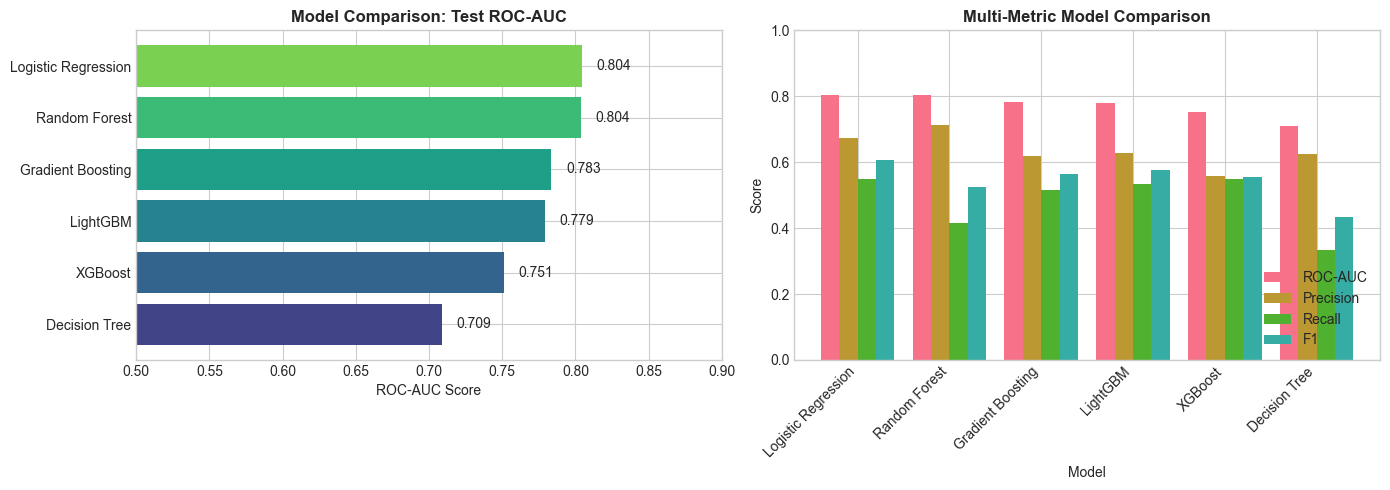

In [25]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC-AUC comparison
ax1 = axes[0]
models_sorted = results_df.sort_values('Test ROC-AUC', ascending=True)
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models_sorted)))
bars = ax1.barh(models_sorted['Model'], models_sorted['Test ROC-AUC'], color=colors)
ax1.set_xlabel('ROC-AUC Score')
ax1.set_title('Model Comparison: Test ROC-AUC', fontsize=12, fontweight='bold')
ax1.set_xlim(0.5, 0.9)
for bar, score in zip(bars, models_sorted['Test ROC-AUC']):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2, f'{score:.3f}', va='center')

# Multiple metrics comparison
ax2 = axes[1]
metrics = ['Test ROC-AUC', 'Test Precision', 'Test Recall', 'Test F1']
x = np.arange(len(results_df))
width = 0.2

for i, metric in enumerate(metrics):
    offset = (i - 1.5) * width
    ax2.bar(x + offset, results_df[metric], width, label=metric.replace('Test ', ''))

ax2.set_xlabel('Model')
ax2.set_ylabel('Score')
ax2.set_title('Multi-Metric Model Comparison', fontsize=12, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.legend(loc='lower right')
ax2.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('../docs/figures/model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

### 5.6 Select Best Model

In [26]:
# Select best model based on ROC-AUC
best_model_name = results_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
best_roc = results[best_model_name]['test_roc']

print(f'Best Model: {best_model_name}')
print(f'Test ROC-AUC: {best_roc:.4f}')

Best Model: Logistic Regression
Test ROC-AUC: 0.8043


### 5.7 Detailed Evaluation of Best Model

In [27]:
# Get predictions for best model
y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

# Classification report
print(f'Classification Report - {best_model_name}')
print('=' * 60)
print(classification_report(y_test, y_pred_best, target_names=['Non-Default', 'Default']))

Classification Report - Logistic Regression
              precision    recall  f1-score   support

 Non-Default       0.82      0.89      0.85       140
     Default       0.67      0.55      0.61        60

    accuracy                           0.79       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.78      0.79      0.78       200



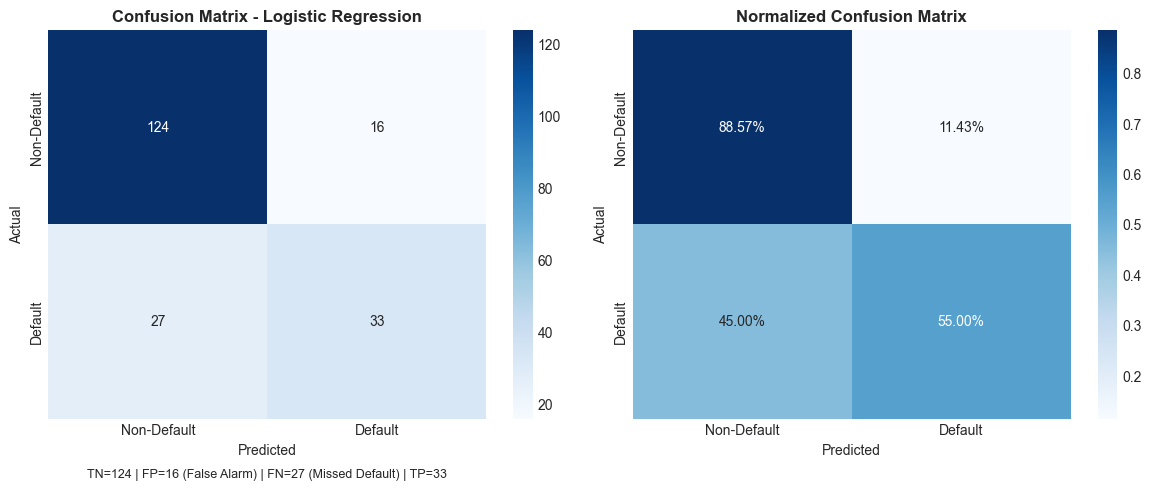


Business Metrics:
  - True Negatives (Correct Non-Default): 124
  - False Positives (False Alarms - Good customers rejected): 16
  - False Negatives (Missed Defaults - Bad loans approved): 27
  - True Positives (Correct Default prediction): 33


In [28]:
# Confusion matrix visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix
ax1 = axes[0]
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
ax1.set_title(f'Confusion Matrix - {best_model_name}', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual')
ax1.set_xlabel('Predicted')

# Add annotations for business context
tn, fp, fn, tp = cm.ravel()
ax1.text(0.5, -0.15, f'TN={tn} | FP={fp} (False Alarm) | FN={fn} (Missed Default) | TP={tp}',
         ha='center', transform=ax1.transAxes, fontsize=9)

# Normalized confusion matrix
ax2 = axes[1]
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', ax=ax2,
            xticklabels=['Non-Default', 'Default'],
            yticklabels=['Non-Default', 'Default'])
ax2.set_title(f'Normalized Confusion Matrix', fontsize=12, fontweight='bold')
ax2.set_ylabel('Actual')
ax2.set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('../docs/figures/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

print(f'\nBusiness Metrics:')
print(f'  - True Negatives (Correct Non-Default): {tn}')
print(f'  - False Positives (False Alarms - Good customers rejected): {fp}')
print(f'  - False Negatives (Missed Defaults - Bad loans approved): {fn}')
print(f'  - True Positives (Correct Default prediction): {tp}')

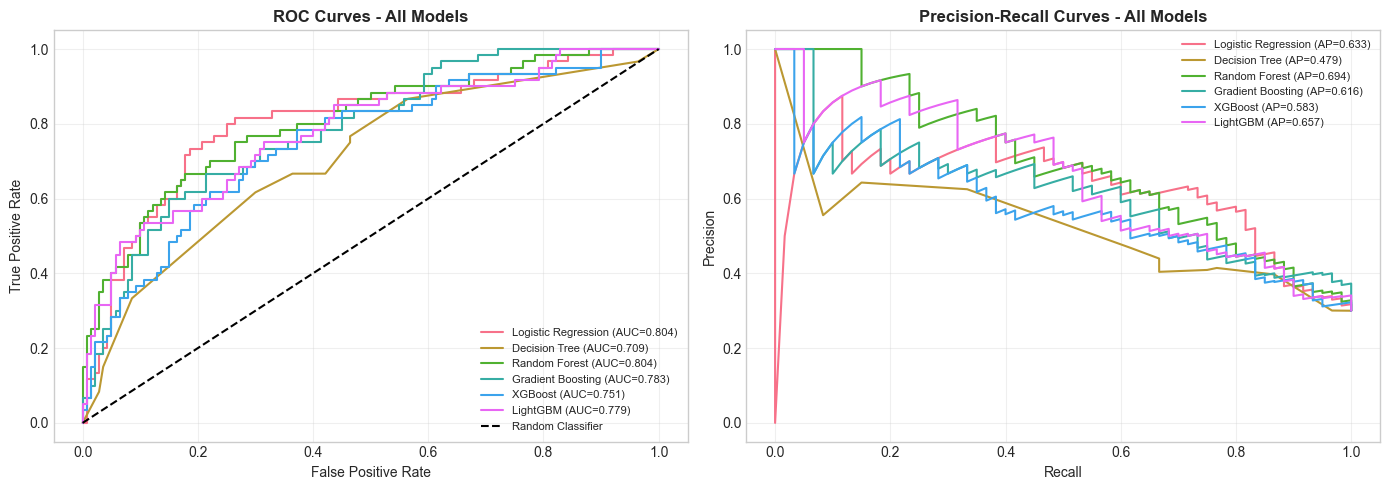

In [29]:
# ROC and PR curves
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curve for all models
ax1 = axes[0]
for name, res in results.items():
    fpr, tpr, _ = roc_curve(y_test, res['y_pred_proba'])
    ax1.plot(fpr, tpr, label=f"{name} (AUC={res['test_roc']:.3f})")

ax1.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves - All Models', fontsize=12, fontweight='bold')
ax1.legend(loc='lower right', fontsize=8)
ax1.grid(True, alpha=0.3)

# Precision-Recall Curve for all models
ax2 = axes[1]
for name, res in results.items():
    precision, recall, _ = precision_recall_curve(y_test, res['y_pred_proba'])
    ap = average_precision_score(y_test, res['y_pred_proba'])
    ax2.plot(recall, precision, label=f"{name} (AP={ap:.3f})")

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves - All Models', fontsize=12, fontweight='bold')
ax2.legend(loc='upper right', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/figures/roc_pr_curves.png', dpi=150, bbox_inches='tight')
plt.show()

## 6. Cost-Sensitive Analysis

### 6.1 Business Cost Matrix

In [30]:
# Define cost matrix for credit risk
# In credit risk, False Negatives (missed defaults) are typically more costly than False Positives

# Cost assumptions (in relative units):
# - True Negative: 0 (correctly approved good loan - earns interest)
# - True Positive: 0 (correctly rejected bad loan - avoided loss)
# - False Positive: 1 (rejected good customer - lost profit opportunity)
# - False Negative: 5 (approved bad loan - default loss is typically 5x the lost profit)

cost_matrix = {
    'TN': 0,   # Correct approval
    'TP': 0,   # Correct rejection
    'FP': 1,   # Lost profit (false alarm)
    'FN': 5    # Default loss (missed detection)
}

print('Cost Matrix for Credit Risk Assessment:')
print('=' * 50)
print(f"True Negative (Correct Approval):  Cost = {cost_matrix['TN']}")
print(f"True Positive (Correct Rejection): Cost = {cost_matrix['TP']}")
print(f"False Positive (Lost Opportunity): Cost = {cost_matrix['FP']}")
print(f"False Negative (Default Loss):     Cost = {cost_matrix['FN']}")
print(f"\nCost Ratio (FN:FP) = {cost_matrix['FN']}:{cost_matrix['FP']}")

Cost Matrix for Credit Risk Assessment:
True Negative (Correct Approval):  Cost = 0
True Positive (Correct Rejection): Cost = 0
False Positive (Lost Opportunity): Cost = 1
False Negative (Default Loss):     Cost = 5

Cost Ratio (FN:FP) = 5:1


In [31]:
# Calculate total cost for each model
print('Total Cost by Model (using default threshold 0.5):')
print('=' * 60)

cost_results = []
for name, res in results.items():
    cm = confusion_matrix(y_test, res['y_pred'])
    tn, fp, fn, tp = cm.ravel()
    
    total_cost = (tn * cost_matrix['TN'] + 
                  tp * cost_matrix['TP'] + 
                  fp * cost_matrix['FP'] + 
                  fn * cost_matrix['FN'])
    
    cost_results.append({
        'Model': name,
        'TN': tn, 'FP': fp, 'FN': fn, 'TP': tp,
        'Total Cost': total_cost
    })
    print(f'{name}: Total Cost = {total_cost}')

cost_df = pd.DataFrame(cost_results).sort_values('Total Cost')
print(f'\nLowest cost model: {cost_df.iloc[0]["Model"]} (Cost = {cost_df.iloc[0]["Total Cost"]})')

Total Cost by Model (using default threshold 0.5):
Logistic Regression: Total Cost = 151
Decision Tree: Total Cost = 212
Random Forest: Total Cost = 185
Gradient Boosting: Total Cost = 164
XGBoost: Total Cost = 161
LightGBM: Total Cost = 159

Lowest cost model: Logistic Regression (Cost = 151)


### 6.2 Threshold Optimization

In [32]:
# Optimize threshold for minimum cost
thresholds = np.arange(0.1, 0.9, 0.05)
threshold_costs = []

for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_best >= thresh).astype(int)
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    
    total_cost = (fp * cost_matrix['FP'] + fn * cost_matrix['FN'])
    
    threshold_costs.append({
        'Threshold': thresh,
        'Total Cost': total_cost,
        'FP': fp,
        'FN': fn,
        'Precision': tp / (tp + fp) if (tp + fp) > 0 else 0,
        'Recall': tp / (tp + fn) if (tp + fn) > 0 else 0
    })

threshold_df = pd.DataFrame(threshold_costs)
optimal_idx = threshold_df['Total Cost'].idxmin()
optimal_threshold = threshold_df.loc[optimal_idx, 'Threshold']

print(f'Optimal Threshold: {optimal_threshold:.2f}')
print(f'Minimum Total Cost: {threshold_df.loc[optimal_idx, "Total Cost"]}')

Optimal Threshold: 0.30
Minimum Total Cost: 93


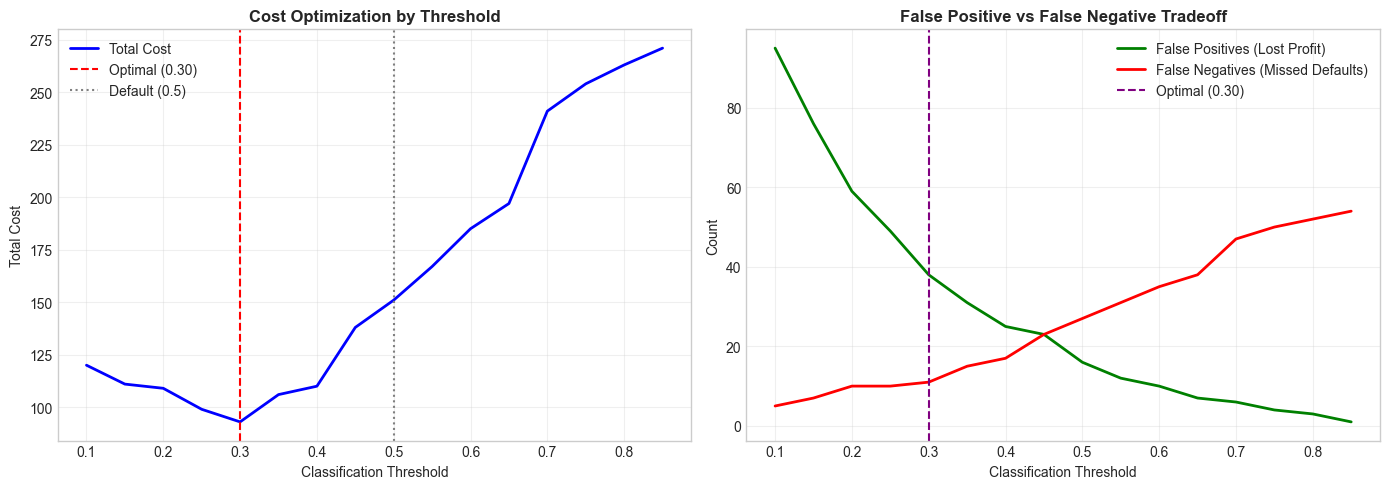

In [33]:
# Visualize threshold optimization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cost vs Threshold
ax1 = axes[0]
ax1.plot(threshold_df['Threshold'], threshold_df['Total Cost'], 'b-', linewidth=2, label='Total Cost')
ax1.axvline(x=optimal_threshold, color='r', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
ax1.axvline(x=0.5, color='gray', linestyle=':', label='Default (0.5)')
ax1.set_xlabel('Classification Threshold')
ax1.set_ylabel('Total Cost')
ax1.set_title('Cost Optimization by Threshold', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# FP vs FN tradeoff
ax2 = axes[1]
ax2.plot(threshold_df['Threshold'], threshold_df['FP'], 'g-', linewidth=2, label='False Positives (Lost Profit)')
ax2.plot(threshold_df['Threshold'], threshold_df['FN'], 'r-', linewidth=2, label='False Negatives (Missed Defaults)')
ax2.axvline(x=optimal_threshold, color='purple', linestyle='--', label=f'Optimal ({optimal_threshold:.2f})')
ax2.set_xlabel('Classification Threshold')
ax2.set_ylabel('Count')
ax2.set_title('False Positive vs False Negative Tradeoff', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/figures/threshold_optimization.png', dpi=150, bbox_inches='tight')
plt.show()

In [34]:
# Compare default vs optimal threshold
print('Comparison: Default (0.5) vs Optimal Threshold')
print('=' * 60)

# Default threshold
y_pred_default = (y_pred_proba_best >= 0.5).astype(int)
cm_default = confusion_matrix(y_test, y_pred_default)
tn_d, fp_d, fn_d, tp_d = cm_default.ravel()
cost_default = fp_d * cost_matrix['FP'] + fn_d * cost_matrix['FN']

# Optimal threshold
y_pred_optimal = (y_pred_proba_best >= optimal_threshold).astype(int)
cm_optimal = confusion_matrix(y_test, y_pred_optimal)
tn_o, fp_o, fn_o, tp_o = cm_optimal.ravel()
cost_optimal = fp_o * cost_matrix['FP'] + fn_o * cost_matrix['FN']

print(f'Default Threshold (0.5):')
print(f'  FP={fp_d}, FN={fn_d}, Total Cost={cost_default}')
print(f'  Precision={tp_d/(tp_d+fp_d):.3f}, Recall={tp_d/(tp_d+fn_d):.3f}')
print()
print(f'Optimal Threshold ({optimal_threshold:.2f}):')
print(f'  FP={fp_o}, FN={fn_o}, Total Cost={cost_optimal}')
print(f'  Precision={tp_o/(tp_o+fp_o):.3f}, Recall={tp_o/(tp_o+fn_o):.3f}')
print()
print(f'Cost Reduction: {cost_default - cost_optimal} ({(cost_default - cost_optimal)/cost_default*100:.1f}%)')

Comparison: Default (0.5) vs Optimal Threshold
Default Threshold (0.5):
  FP=16, FN=27, Total Cost=151
  Precision=0.673, Recall=0.550

Optimal Threshold (0.30):
  FP=38, FN=11, Total Cost=93
  Precision=0.563, Recall=0.817

Cost Reduction: 58 (38.4%)


## 7. Model Interpretability

### 7.1 Feature Importance

In [35]:
# Get feature names after one-hot encoding
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(cat_feature_names)

# Get feature importance from best model (if tree-based)
if hasattr(best_model, 'feature_importances_'):
    importances = best_model.feature_importances_
    
    # Create DataFrame
    importance_df = pd.DataFrame({
        'Feature': all_feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)
    
    # Plot top 20 features
    plt.figure(figsize=(10, 8))
    top_features = importance_df.head(20)
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(top_features)))
    plt.barh(range(len(top_features)), top_features['Importance'].values, color=colors)
    plt.yticks(range(len(top_features)), top_features['Feature'].values)
    plt.xlabel('Feature Importance')
    plt.title(f'Top 20 Feature Importances - {best_model_name}', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.savefig('../docs/figures/feature_importance.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    print('\nTop 10 Most Important Features:')
    print(importance_df.head(10).to_string(index=False))

### 7.2 SHAP Analysis

In [37]:
# SHAP analysis for model interpretability
print('Calculating SHAP values...')

# Use a sample for faster computation
sample_size = min(200, len(X_test_processed))
X_sample = X_test_processed[:sample_size]

# For Logistic Regression, use LinearExplainer or Explainer
# For tree models, use TreeExplainer
if isinstance(best_model, LogisticRegression):
    explainer = shap.LinearExplainer(best_model, X_train_processed)
    shap_values = explainer.shap_values(X_sample)
else:
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_sample)
    # For binary classification, shap_values might be a list
    if isinstance(shap_values, list):
        shap_values = shap_values[1]  # Use values for positive class (default)

print('SHAP values calculated!')

Calculating SHAP values...
SHAP values calculated!


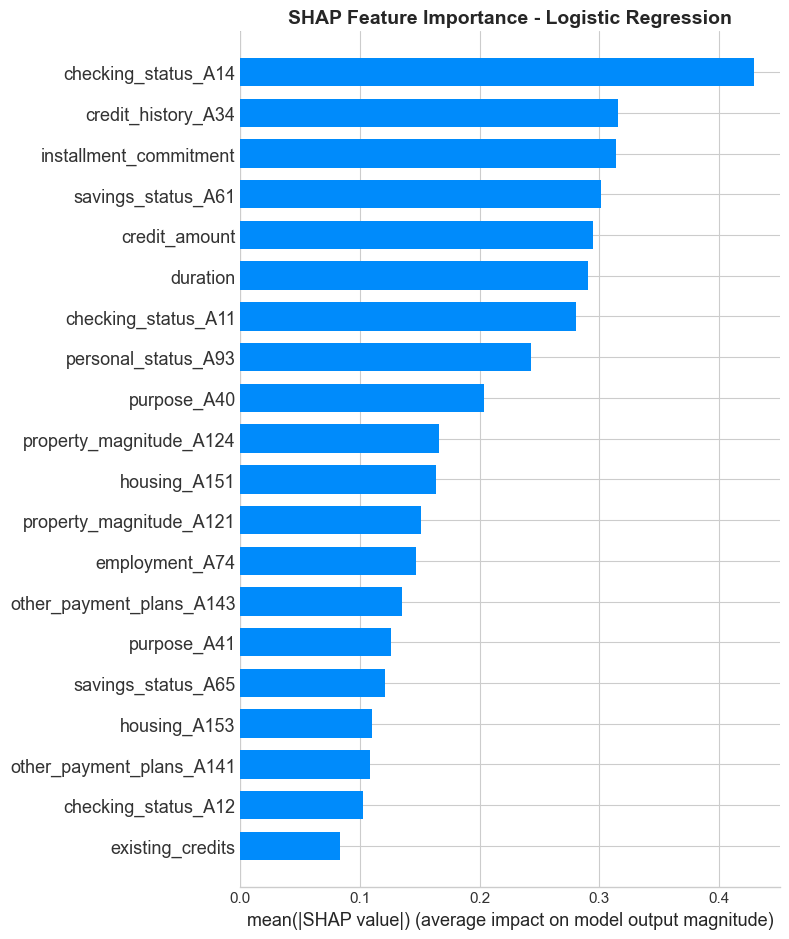

In [38]:
# SHAP summary bar plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_sample, feature_names=all_feature_names, 
                  plot_type='bar', show=False, max_display=20)
plt.title(f'SHAP Feature Importance - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/figures/shap_importance.png', dpi=150, bbox_inches='tight')
plt.show()

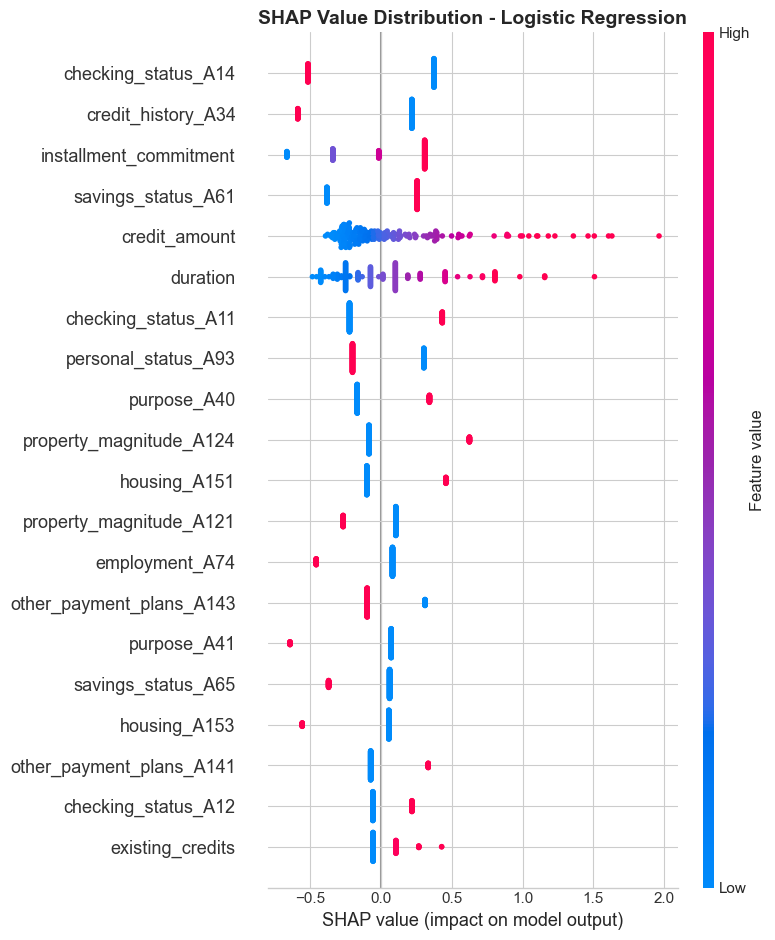

In [39]:
# SHAP beeswarm plot
plt.figure(figsize=(10, 10))
shap.summary_plot(shap_values, X_sample, feature_names=all_feature_names, 
                  show=False, max_display=20)
plt.title(f'SHAP Value Distribution - {best_model_name}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/figures/shap_beeswarm.png', dpi=150, bbox_inches='tight')
plt.show()

### 7.3 Risk Score Distribution

In [40]:
# Create risk score segments
risk_scores = pd.DataFrame({
    'Actual': y_test.values,
    'Probability': y_pred_proba_best
})

risk_scores['Risk_Category'] = pd.cut(risk_scores['Probability'],
                                       bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0],
                                       labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Risk segment analysis
risk_analysis = risk_scores.groupby('Risk_Category', observed=True).agg({
    'Actual': ['sum', 'count', 'mean']
}).round(3)

risk_analysis.columns = ['Defaults', 'Total', 'Default Rate']
risk_analysis['Default Rate'] = (risk_analysis['Default Rate'] * 100).round(1)

print('Risk Segment Analysis:')
print('=' * 60)
print(risk_analysis)

Risk Segment Analysis:
               Defaults  Total  Default Rate
Risk_Category                               
Very Low             10     91          11.0
Low                   7     41          17.1
Medium               18     33          54.5
High                 17     24          70.8
Very High             8     11          72.7


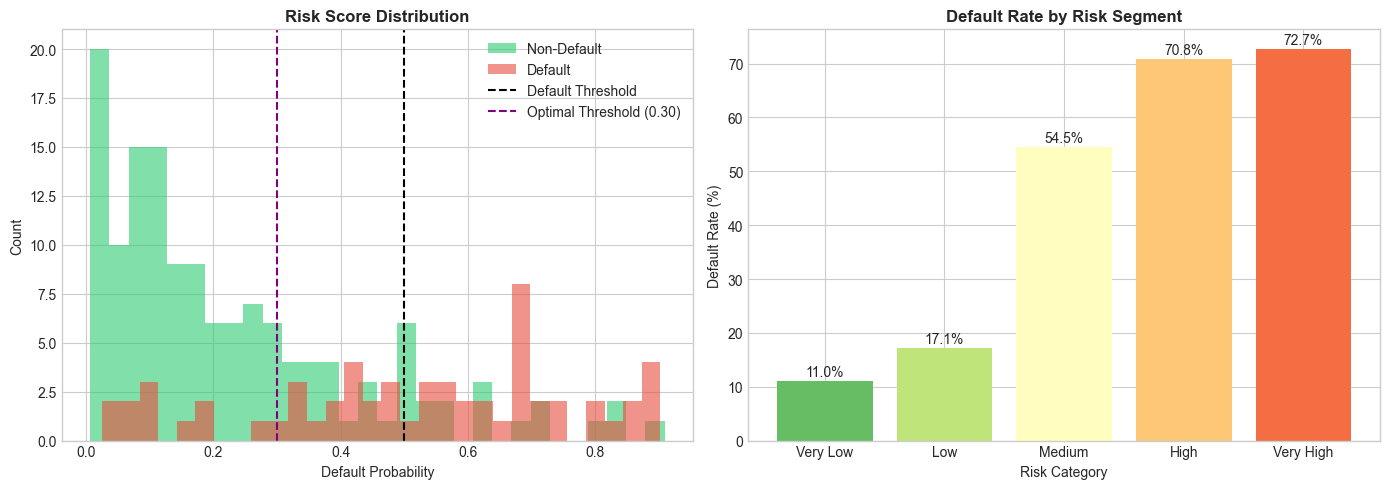

In [41]:
# Visualize risk distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Risk score distribution
ax1 = axes[0]
ax1.hist(risk_scores[risk_scores['Actual'] == 0]['Probability'], bins=30, alpha=0.6, 
         label='Non-Default', color='#2ecc71')
ax1.hist(risk_scores[risk_scores['Actual'] == 1]['Probability'], bins=30, alpha=0.6,
         label='Default', color='#e74c3c')
ax1.axvline(x=0.5, color='black', linestyle='--', label='Default Threshold')
ax1.axvline(x=optimal_threshold, color='purple', linestyle='--', label=f'Optimal Threshold ({optimal_threshold:.2f})')
ax1.set_xlabel('Default Probability')
ax1.set_ylabel('Count')
ax1.set_title('Risk Score Distribution', fontsize=12, fontweight='bold')
ax1.legend()

# Default rate by risk segment
ax2 = axes[1]
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.8, len(risk_analysis)))
bars = ax2.bar(risk_analysis.index.astype(str), risk_analysis['Default Rate'], color=colors)
ax2.set_xlabel('Risk Category')
ax2.set_ylabel('Default Rate (%)')
ax2.set_title('Default Rate by Risk Segment', fontsize=12, fontweight='bold')
for bar, rate in zip(bars, risk_analysis['Default Rate']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{rate}%', 
             ha='center', fontsize=10)

plt.tight_layout()
plt.savefig('../docs/figures/risk_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

## 8. Business Recommendations

In [42]:
# Generate business recommendations
print('\n' + '=' * 70)
print('CREDIT RISK ASSESSMENT - BUSINESS RECOMMENDATIONS')
print('=' * 70)

print('\n📊 MODEL PERFORMANCE SUMMARY:')
print(f'  • Best Model: {best_model_name}')
print(f'  • ROC-AUC: {best_roc:.4f}')
print(f'  • Default Threshold (0.5): Recall={tp_d/(tp_d+fn_d):.3f}, Precision={tp_d/(tp_d+fp_d):.3f}')
print(f'  • Optimal Threshold ({optimal_threshold:.2f}): Recall={tp_o/(tp_o+fn_o):.3f}, Precision={tp_o/(tp_o+fp_o):.3f}')

print('\n🔑 KEY RISK FACTORS (Top 5):')
if hasattr(best_model, 'feature_importances_'):
    for i, row in importance_df.head(5).iterrows():
        print(f'  {i+1}. {row["Feature"]}: {row["Importance"]:.4f}')

print('\n💰 COST OPTIMIZATION:')
print(f'  • Default threshold cost: {cost_default}')
print(f'  • Optimal threshold cost: {cost_optimal}')
print(f'  • Cost reduction: {cost_default - cost_optimal} ({(cost_default - cost_optimal)/cost_default*100:.1f}%)')

print('\n🎯 RECOMMENDED ACTIONS:')
print('  1. APPROVAL STRATEGY:')
print(f'     - Very Low Risk (<20% prob): Auto-approve')
print(f'     - Low Risk (20-40%): Standard approval')
print(f'     - Medium Risk (40-60%): Enhanced review required')
print(f'     - High Risk (>60%): Decline or require collateral')

print('\n  2. MONITORING:')
print('     - Implement real-time scoring for new applications')
print('     - Monthly model performance monitoring')
print('     - Quarterly model retraining with new data')

print('\n  3. RISK MITIGATION:')
print('     - Require checking accounts for high-risk applicants')
print('     - Adjust credit limits based on risk score')
print('     - Implement tiered interest rates by risk category')


CREDIT RISK ASSESSMENT - BUSINESS RECOMMENDATIONS

📊 MODEL PERFORMANCE SUMMARY:
  • Best Model: Logistic Regression
  • ROC-AUC: 0.8043
  • Default Threshold (0.5): Recall=0.550, Precision=0.673
  • Optimal Threshold (0.30): Recall=0.817, Precision=0.563

🔑 KEY RISK FACTORS (Top 5):

💰 COST OPTIMIZATION:
  • Default threshold cost: 151
  • Optimal threshold cost: 93
  • Cost reduction: 58 (38.4%)

🎯 RECOMMENDED ACTIONS:
  1. APPROVAL STRATEGY:
     - Very Low Risk (<20% prob): Auto-approve
     - Low Risk (20-40%): Standard approval
     - Medium Risk (40-60%): Enhanced review required
     - High Risk (>60%): Decline or require collateral

  2. MONITORING:
     - Implement real-time scoring for new applications
     - Monthly model performance monitoring
     - Quarterly model retraining with new data

  3. RISK MITIGATION:
     - Require checking accounts for high-risk applicants
     - Adjust credit limits based on risk score
     - Implement tiered interest rates by risk category


## 9. Save Model and Artifacts

In [43]:
# Save model and preprocessor
joblib.dump(best_model, '../models/credit_risk_model.joblib')
joblib.dump(preprocessor, '../models/preprocessor.joblib')

print(f'Model saved: ../models/credit_risk_model.joblib')
print(f'Preprocessor saved: ../models/preprocessor.joblib')

Model saved: ../models/credit_risk_model.joblib
Preprocessor saved: ../models/preprocessor.joblib


In [44]:
# Save processed data
df_features.to_csv('../data/processed/german_credit_processed.csv', index=False)
print('Processed data saved: ../data/processed/german_credit_processed.csv')

Processed data saved: ../data/processed/german_credit_processed.csv


In [45]:
# Final summary
print('\n' + '=' * 70)
print('PROJECT SUMMARY')
print('=' * 70)

print('\n📊 DATASET:')
print(f'  • Total applicants: {len(df):,}')
print(f'  • Features: {len(numerical_features) + len(categorical_features)}')
print(f'  • Default rate: 30.0%')

print(f'\n🤖 BEST MODEL: {best_model_name}')
print(f'  • Test ROC-AUC: {best_roc:.4f}')
print(f'  • Test Accuracy: {results[best_model_name]["test_accuracy"]:.4f}')
print(f'  • Test F1 Score: {results[best_model_name]["test_f1"]:.4f}')
print(f'  • Test Precision: {results[best_model_name]["test_precision"]:.4f}')
print(f'  • Test Recall: {results[best_model_name]["test_recall"]:.4f}')

print('\n🔑 TOP PREDICTIVE FEATURES:')
if hasattr(best_model, 'feature_importances_'):
    for idx, row in importance_df.head(5).iterrows():
        print(f'  {idx+1}. {row["Feature"]}')

print('\n' + '=' * 70)


PROJECT SUMMARY

📊 DATASET:
  • Total applicants: 1,000
  • Features: 22
  • Default rate: 30.0%

🤖 BEST MODEL: Logistic Regression
  • Test ROC-AUC: 0.8043
  • Test Accuracy: 0.7850
  • Test F1 Score: 0.6055
  • Test Precision: 0.6735
  • Test Recall: 0.5500

🔑 TOP PREDICTIVE FEATURES:

